# Topic Modeling 2

## Models built in Google Colab

### Gensim LDA Preprocessing

In [1]:
# uploading to collab
from google.colab import files
upload = files.upload()

Saving headlines_df.csv to headlines_df.csv


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import phrases
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import warnings
warnings.filterwarnings("ignore")
from gensim.models import CoherenceModel
from tqdm import tqdm_notebook as tq
nltk.download('wordnet')
import spacy

C:\Users\dlm66\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\dlm66\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dlm66\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# reading in the data
headlines = pd.read_csv('headlines_df.csv')
headlines.head()

brand        country medium  \
0                Tzabar         Israel  Print   
1              Infiniti  United States  Print   
2                Toyota         Canada  Print   
3  Friends of the Earth        Germany  Print   
4            Max Factor       Colombia  Print   

                                            headline  \
0  roger waters live in paris 3 nights  concert €...   
1                            accelerating the future   
2    official ride of the spinfest amateur dj awards   
3  travelling fruits cause pollution think global...   
4                                  the art of beauty   

                       industry  
0           Transport & Tourism  
1         Automotive & Services  
2         Automotive & Services  
3  Public interest & Non-profit  
4               Beauty & Health

In [3]:
# aliasing the features to be analyzed
text = headlines.headline

In [4]:
# defining text preprocessing functions as done in the other topic modeling notebook
def remove_stopwords(text):
    return [token for token in simple_preprocess(text, deacc=True) if token not in STOPWORDS and len(token)>2]
def lemmatize_stemming(text):
    short = []
    for word in text:
        short.append(SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(word)))
    return short
def trigrams(text):
    bigram = gensim.models.Phrases(text)
    bigramizer = phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[text], threshold=5)
    trigramizer = phrases.Phraser(trigram)
    return [trigramizer[bigramizer[doc]] for doc in text]

def preprocess(text):
    stopped_tokenize = text.map(remove_stopwords)
    short = list(stopped_tokenize.map(lemmatize_stemming))
    return trigrams(short)

In [5]:
# preprocessing text and saving into a series
processed = pd.Series(preprocess(text))

In [0]:
# creating dictionary and filtering
dictionary = gensim.corpora.Dictionary(processed)
dictionary.filter_extremes(no_below=5, no_above=0.33, keep_n=20000)

In [0]:
# creating bow corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [0]:
# tfidf vectorizing data
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

### Gensim LDA Model Building

In [0]:
# fitting lda model and printing coherene score and topics
lda = models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=3, decay=.9)
cscore = CoherenceModel(model=lda, texts=processed, dictionary=dictionary, coherence='c_v').get_coherence()
print(cscore)
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0.41944896114494
Topic: 0 
Words: 0.009*"power" + 0.008*"insid" + 0.007*"sound" + 0.007*"feel" + 0.006*"faster" + 0.006*"woman" + 0.006*"toy" + 0.006*"milk" + 0.006*"think" + 0.006*"natur"
Topic: 1 
Words: 0.008*"skin" + 0.008*"protect" + 0.007*"save" + 0.007*"space" + 0.007*"origin" + 0.006*"tast" + 0.006*"ford" + 0.006*"energi" + 0.006*"child" + 0.005*"belong"
Topic: 2 
Words: 0.008*"let" + 0.008*"dream" + 0.007*"sleep" + 0.006*"hand" + 0.005*"world" + 0.005*"job" + 0.005*"wall" + 0.005*"built" + 0.005*"incred" + 0.005*"refresh"
Topic: 3 
Words: 0.007*"fish" + 0.006*"read" + 0.006*"word" + 0.006*"pain" + 0.005*"choic" + 0.005*"like" + 0.005*"life" + 0.005*"free" + 0.004*"peopl" + 0.004*"fight"
Topic: 4 
Words: 0.010*"new" + 0.008*"imagin" + 0.006*"need" + 0.006*"night" + 0.006*"know" + 0.006*"good" + 0.006*"need_help" + 0.005*"pet" + 0.005*"there" + 0.005*"movi"
Topic: 5 
Words: 0.008*"book" + 0.007*"game" + 0.007*"stop" + 0.007*"driver" + 0.006*"readi" + 0.006*"music" + 0.006*"colou

In [0]:
# same here but with 100 topics!
lda2 = models.LdaMulticore(corpus_tfidf, num_topics=100, id2word=dictionary, passes=3, decay=.9)
cscore = CoherenceModel(model=lda2, texts=processed, dictionary=dictionary, coherence='c_v').get_coherence()
print(cscore)
for idx, topic in lda2.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0.6171967228678602
Topic: 0 
Words: 0.065*"milk" + 0.061*"elimin" + 0.054*"thank" + 0.048*"innov" + 0.042*"excit" + 0.033*"award" + 0.027*"rate" + 0.020*"use_condom" + 0.018*"bear" + 0.018*"maximum"
Topic: 1 
Words: 0.040*"cold" + 0.040*"express" + 0.039*"heart" + 0.034*"flight" + 0.033*"friday" + 0.028*"record" + 0.028*"harder" + 0.027*"trendi" + 0.026*"heineken" + 0.026*"sustain"
Topic: 2 
Words: 0.064*"man" + 0.059*"expect" + 0.053*"water" + 0.049*"import" + 0.044*"like" + 0.036*"adventur" + 0.036*"spot" + 0.036*"time" + 0.034*"round" + 0.033*"deliv"
Topic: 3 
Words: 0.083*"breath" + 0.046*"born" + 0.034*"catch" + 0.033*"deal" + 0.031*"relax" + 0.029*"absolut" + 0.029*"kid" + 0.026*"theyr" + 0.024*"wet" + 0.023*"equip"
Topic: 4 
Words: 0.060*"pain" + 0.047*"head" + 0.043*"cool" + 0.040*"mini" + 0.034*"drop" + 0.032*"modern" + 0.031*"consum" + 0.030*"museum" + 0.029*"respect" + 0.026*"weve"
Topic: 5 
Words: 0.081*"open" + 0.054*"safeti" + 0.050*"winter" + 0.050*"hour" + 0.040*"far" +

### SKLearn LDA/NMF Preprocessing

In [6]:
#importing libraries
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# removing stop words from text
stopped = text.map(remove_stopwords)

In [9]:
import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

In [10]:
# creating function to lemmatize text and filter for just the four below parts of speech
def lemmatize(text, postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    text_out = []
    for item in tq(text):
        doc = nlp(' '.join(item))
        text_out.append(' '.join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in postags]))
    return text_out
lemmas = lemmatize(list(stopped))

In [13]:
# checking preprocessed sample
lemmas[:5]

['roger water live paris night concert monday',
 'accelerate future',
 'official ride spinf amateur award',
 'travel fruit because pollution think global eat local',
 'art beauty']

In [11]:
# learned that LDA should just use count vectorization while NMF takes TFIDF, setting up both below
tfvectorizer = TfidfVectorizer(analyzer='word', min_df=5, max_df=.33, token_pattern='[a-zA-Z0-9]{2,}', max_features=20000)
data_tfvect = tfvectorizer.fit_transform(lemmas)
cvectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word', min_df=5, max_df=.33, token_pattern='[a-zA-Z0-9]{2,}', max_features=20000)
data_cvect = cvectorizer.fit_transform(lemmas)

### SKLearn LDA Model Building

In [ ]:
# paramter ranges for randomized search of LDA algorithm
params = {'n_components': range(10,26), 'learning_decay' : [.5,.6,.7,.8,.9],'doc_topic_prior': [.05,.1,.2,.3,.4,.5,.75,1], 'topic_word_prior':[.05,.1,.2,.3,.4,.5,.75,1]}

In [15]:
# instantiating lda object and running randomized search
lda = LatentDirichletAllocation()
model = RandomizedSearchCV(lda,param_distributions=params, verbose=3, n_jobs=-1)
model.fit(data_cvect)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_components': range(10, 26), 'learning_decay': [0.5, 0.6, 0.7, 0.8, 0.9], 'doc_topic_prior': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1], 'topic_word_prior': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=3)

In [16]:
# aliasing best model and print best parameters
best_model = model.best_estimator_
print(model.best_params_)

{'topic_word_prior': 0.5, 'n_components': 11, 'learning_decay': 0.8, 'doc_topic_prior': 0.3}


In [17]:
# printing scores. highly contextual and not necessarily conclusive, but helpful nonetheless
print(model.best_score_)

-477741.9171161971


In [18]:
print(best_model.perplexity(data_cvect))

3397.4268553375005


In [14]:
# fitting best model to vectorized data
best_model.fit(data_cvect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.3,
             evaluate_every=-1, learning_decay=0.8,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=11, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=0.5,
             total_samples=1000000.0, verbose=0)

In [15]:
# transforming data
lda_output = best_model.transform(data_cvect)

In [0]:
# printing document index and its assigned topic
for n in range(lda_output.shape[0]):
    topic_most_pr = lda_output[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

doc: 0 topic: 4

doc: 1 topic: 5

doc: 2 topic: 9

doc: 3 topic: 8

doc: 4 topic: 0

doc: 5 topic: 5

doc: 6 topic: 3

doc: 7 topic: 2

doc: 8 topic: 4

doc: 9 topic: 10

doc: 10 topic: 7

doc: 11 topic: 5

doc: 12 topic: 0

doc: 13 topic: 10

doc: 14 topic: 0

doc: 15 topic: 8

doc: 16 topic: 0

doc: 17 topic: 9

doc: 18 topic: 4

doc: 19 topic: 5

doc: 20 topic: 6

doc: 21 topic: 9

doc: 22 topic: 4

doc: 23 topic: 6

doc: 24 topic: 5

doc: 25 topic: 9

doc: 26 topic: 0

doc: 27 topic: 10

doc: 28 topic: 3

doc: 29 topic: 4

doc: 30 topic: 1

doc: 31 topic: 4

doc: 32 topic: 5

doc: 33 topic: 10

doc: 34 topic: 0

doc: 35 topic: 0

doc: 36 topic: 3

doc: 37 topic: 10

doc: 38 topic: 7

doc: 39 topic: 4

doc: 40 topic: 7

doc: 41 topic: 2

doc: 42 topic: 4

doc: 43 topic: 7

doc: 44 topic: 10

doc: 45 topic: 3

doc: 46 topic: 6

doc: 47 topic: 1

doc: 48 topic: 5

doc: 49 topic: 2

doc: 50 topic: 0

doc: 51 topic: 7

doc: 52 topic: 2

doc: 53 topic: 3

doc: 54 topic: 0

doc: 55 topic:

In [0]:
best_model.components_

array([[ 0.10000506,  0.10000431,  0.10000165, ...,  0.10001548,
         0.10000202, 11.11057689],
       [ 7.18181667,  0.10002299,  0.10002212, ...,  0.10002936,
         0.84374449,  0.10000103],
       [ 0.10000051,  0.93071575,  0.10001507, ...,  0.10003607,
         0.10001524,  0.10000242],
       ...,
       [ 0.10000741,  0.1000023 ,  6.52309525, ...,  0.10000298,
        18.06507253,  0.10000129],
       [ 0.10000335,  0.10000706,  0.10001366, ...,  0.10000195,
         3.8374202 ,  0.10000279],
       [ 0.10000007,  0.10003715,  0.10000345, ...,  0.72111578,
         1.32509666,  0.10000447]])

In [0]:
lda_output

array([[0.02783209, 0.02782228, 0.02782175, ..., 0.02782314, 0.02785255,
        0.02783296],
       [0.04196334, 0.04196594, 0.04195937, ..., 0.04197991, 0.6221148 ,
        0.04205878],
       [0.03661617, 0.6703957 , 0.03663979, ..., 0.03661623, 0.03662685,
        0.03662183],
       ...,
       [0.02136462, 0.02135771, 0.02136039, ..., 0.0652372 , 0.02135677,
        0.02135718],
       [0.03338548, 0.03337712, 0.0333747 , ..., 0.03337933, 0.20906537,
        0.52392827],
       [0.03402675, 0.03406583, 0.03403091, ..., 0.03402671, 0.03402853,
        0.03402598]])

In [20]:
# defining function like in other notebook displaying 
def show_topics(vectorizer, lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [21]:
show_topics(cvectorizer, best_model)

[array(['help', 'child', 'kid', 'year', 'happen', 'world', 'school',
        'there', 'job', 'break'], dtype='<U30'),
 array(['love', 'day', 'thing', 'man', 'free', 'great', 'good', 'woman',
        'buy', 'be'], dtype='<U30'),
 array(['not', 'do', 'do not', 'stop', 'will', 'know', 'live', 'time',
        'drive', 'will not'], dtype='<U30'),
 array(['need', 'water', 'nature', 'fast', 'art', 'food', 'clean', 'get',
        'color', 'world'], dtype='<U30'),
 array(['time', 'people', 'home', 'bring', 'end', 'support', 'book',
        'fight', 'movie', 'sport'], dtype='<U30'),
 array(['taste', 'year', 'turn', 'away', 'travel', 'fresh', 'animal',
        'phone', 'park', 'history'], dtype='<U30'),
 array(['not', 'let', 'do not', 'do', 'be', 'story', 'power', 'hand',
        'not let', 'do not let'], dtype='<U30'),
 array(['life', 'know', 'car', 'save', 'play', 'drink', 'kill', 'drive',
        'night', 'go'], dtype='<U30'),
 array(['think', 'music', 'see', 'new', 'eat', 'good', 'friend', 'f

### Topic Visualizations

In [22]:
# importing clustering and dimensionality reduction functions to visualize topics
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
clusters = KMeans(n_clusters=11).fit_predict(lda_output)
svd = TruncatedSVD(n_components=2)
lda_output_svd = svd.fit_transform(lda_output)

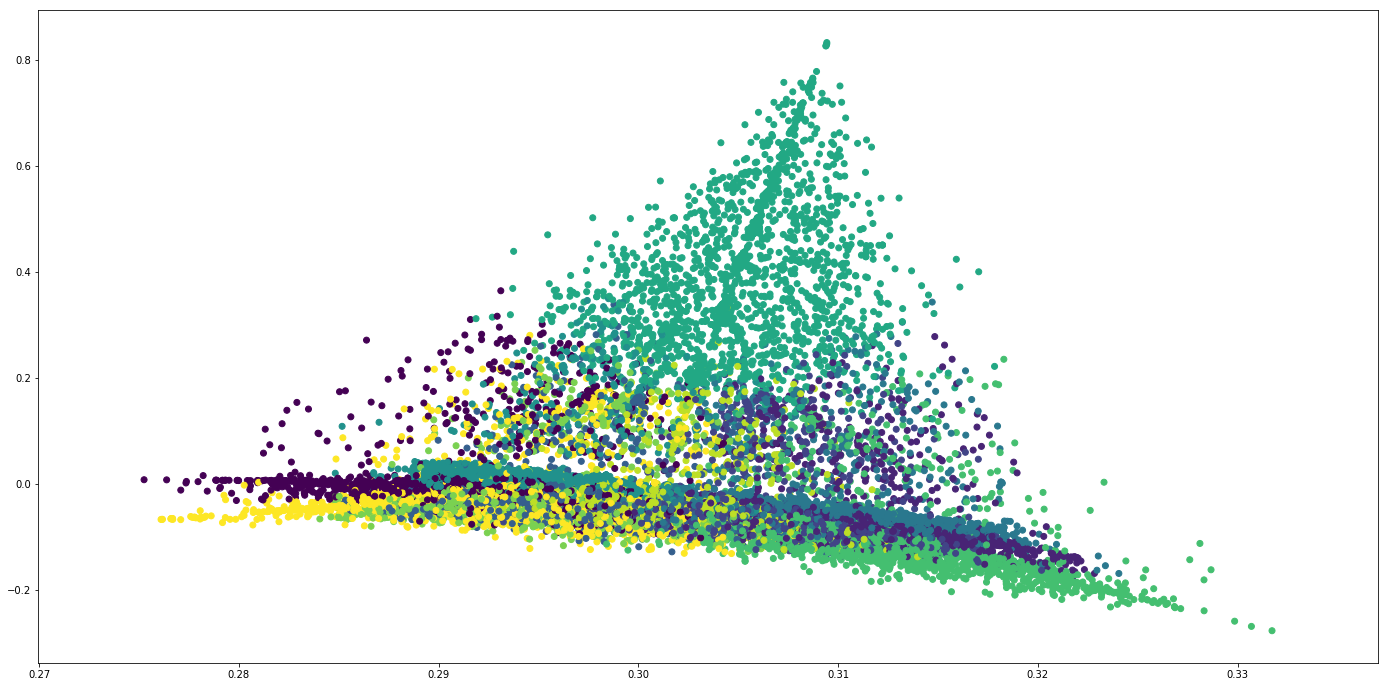

In [23]:
# plotting SVD clusters with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
x = lda_output_svd[:,0]
y = lda_output_svd[:,1]
plt.figure(figsize=(24,12))
plt.scatter(x,y,c=clusters)

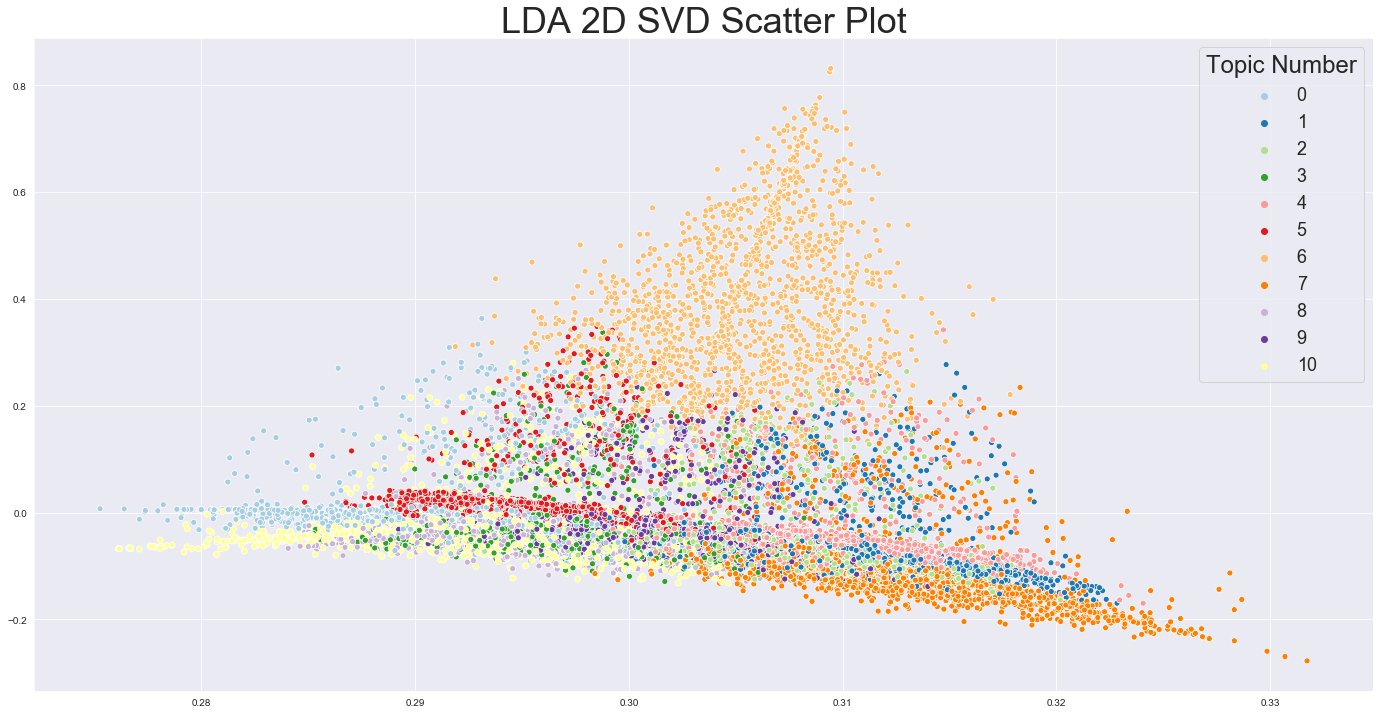

In [41]:
# moving on to seaborn
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))
svd2plot=sns.scatterplot(x=lda_output_svd[:,0], y=lda_output_svd[:,1], hue=clusters, legend='full', palette=sns.color_palette('Paired')[:11], markers='v')
svd2plot.legend(title_fontsize=24,fontsize=18).set_title('Topic Number')
svd2plot.set_title('LDA 2D SVD Scatter Plot', fontsize=36)
fig = svd2plot.get_figure()
fig.savefig('LDA_2D_SVD_Scatter_Plot.png')

In [32]:
# using other method PCA as well
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lda_output_pca = pca.fit_transform(lda_output)

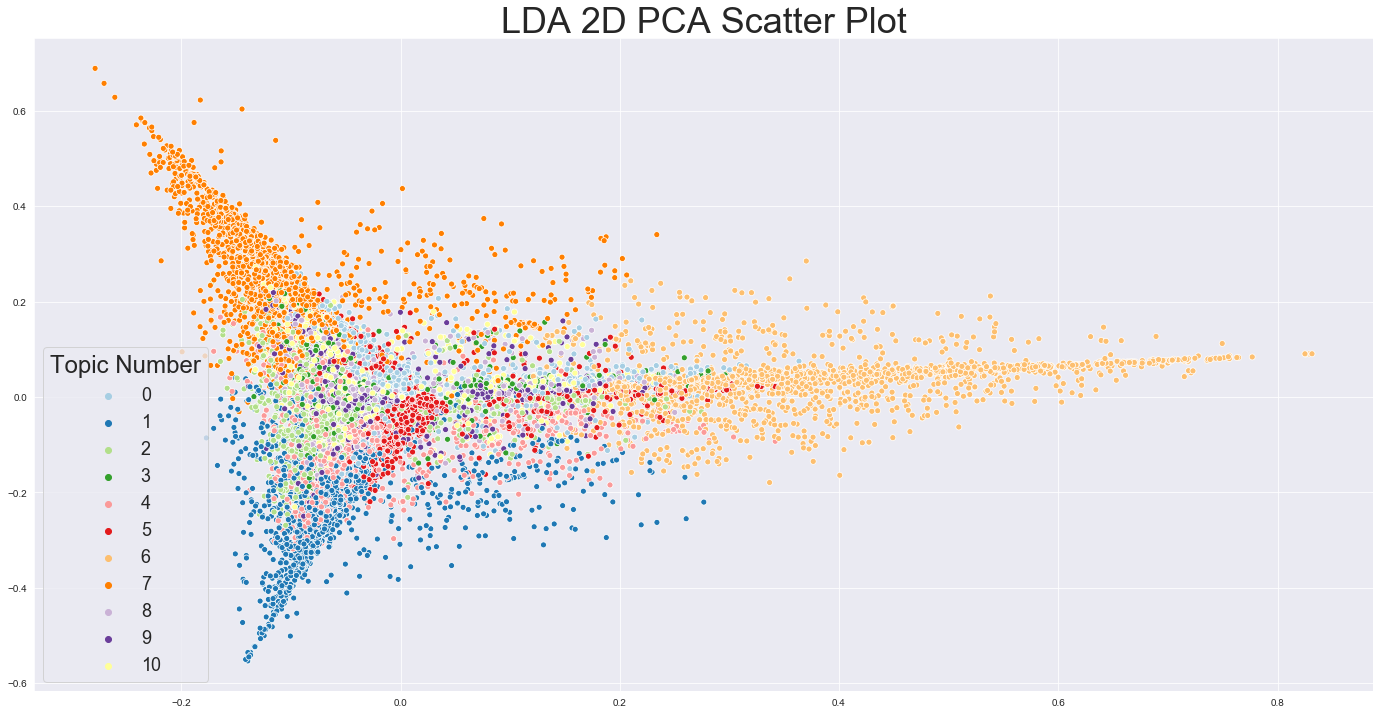

In [40]:
x = lda_output_pca[:,0]
y = lda_output_pca[:,1]
plt.figure(figsize=(24,12))
pca2plot=sns.scatterplot(x,y,hue=clusters, legend='full', palette=sns.color_palette('Paired')[:11])
pca2plot.legend(title_fontsize=24,fontsize=18).set_title('Topic Number')
pca2plot.set_title('LDA 2D PCA Scatter Plot', fontsize=36)
fig = pca2plot.get_figure()
fig.savefig('LDA_2D_PCA_Scatter_Plot.png')

In [42]:
# now looking at three dimensions
pca3 = PCA(n_components=3)
lda_output_pca3 = pca3.fit_transform(lda_output)

In [43]:
# aliasing and creating dataframe since data needs to be formatted in cetain way for 3D graphing model to read it
x3 = lda_output_pca3[:,0]
y3 = lda_output_pca3[:,1]
z3 = lda_output_pca3[:,2]

In [44]:
d = {'x':x3, 'y':y3, 'z':z3, 'topic':clusters}
pca3df = pd.DataFrame(d)
pca3df.head()

x         y         z  topic
0 -0.041114  0.000623  0.027179      9
1 -0.024534  0.013116  0.025220      3
2 -0.042538 -0.053278  0.139612      3
3  0.034729  0.039945  0.005632      0
4 -0.011962  0.019953  0.008099      0

In [45]:
# sorting to legend appears this way in visual
sorted(pca3df.topic.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

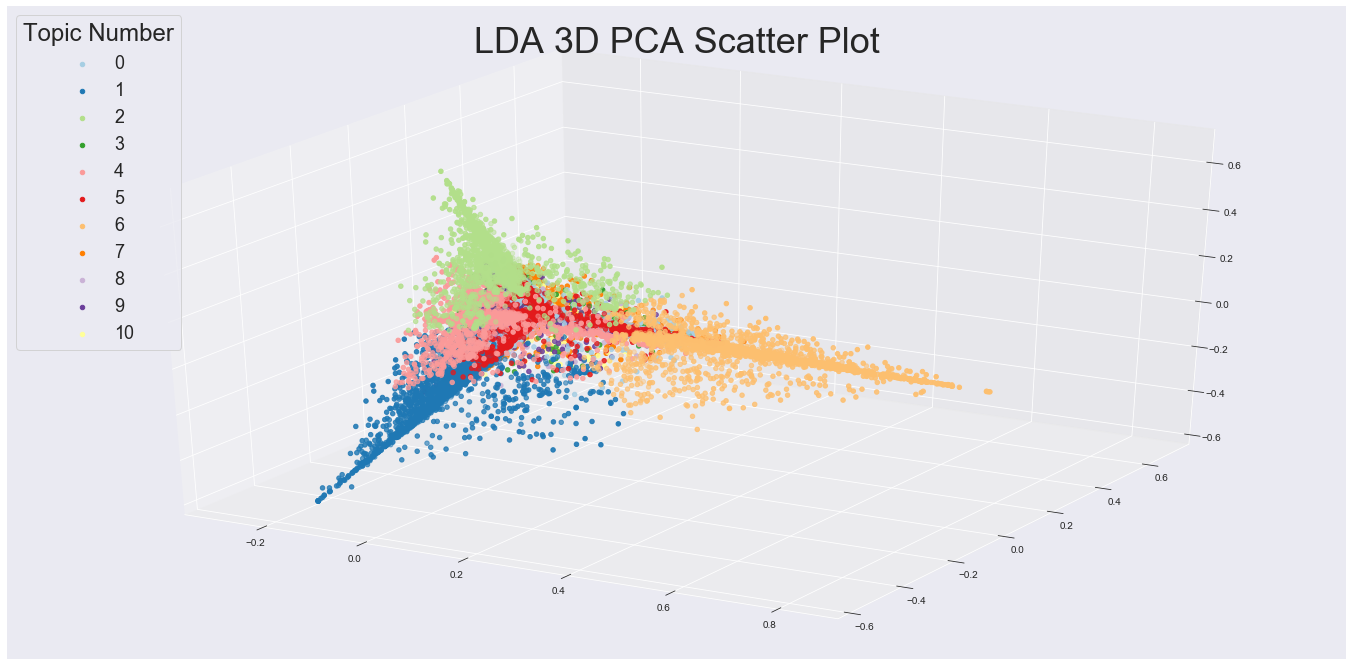

In [52]:
# 3D PCA plot!
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
for i, topic in enumerate(sorted(pca3df.topic.unique())):
    ax.scatter(xs=pca3df.loc[pca3df.topic == topic,'x'],ys=pca3df.loc[pca3df.topic == topic,'y'],zs=pca3df.loc[pca3df.topic == topic,'z'],label=topic, c=sns.color_palette('Paired')[i])
ax.set_title('LDA 3D PCA Scatter Plot', fontsize=36)
ax.legend(title_fontsize=24,fontsize=18, loc='upper left').set_title('Topic Number')
fig.savefig('LDA_3D_PCA_Scatter_Plot')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

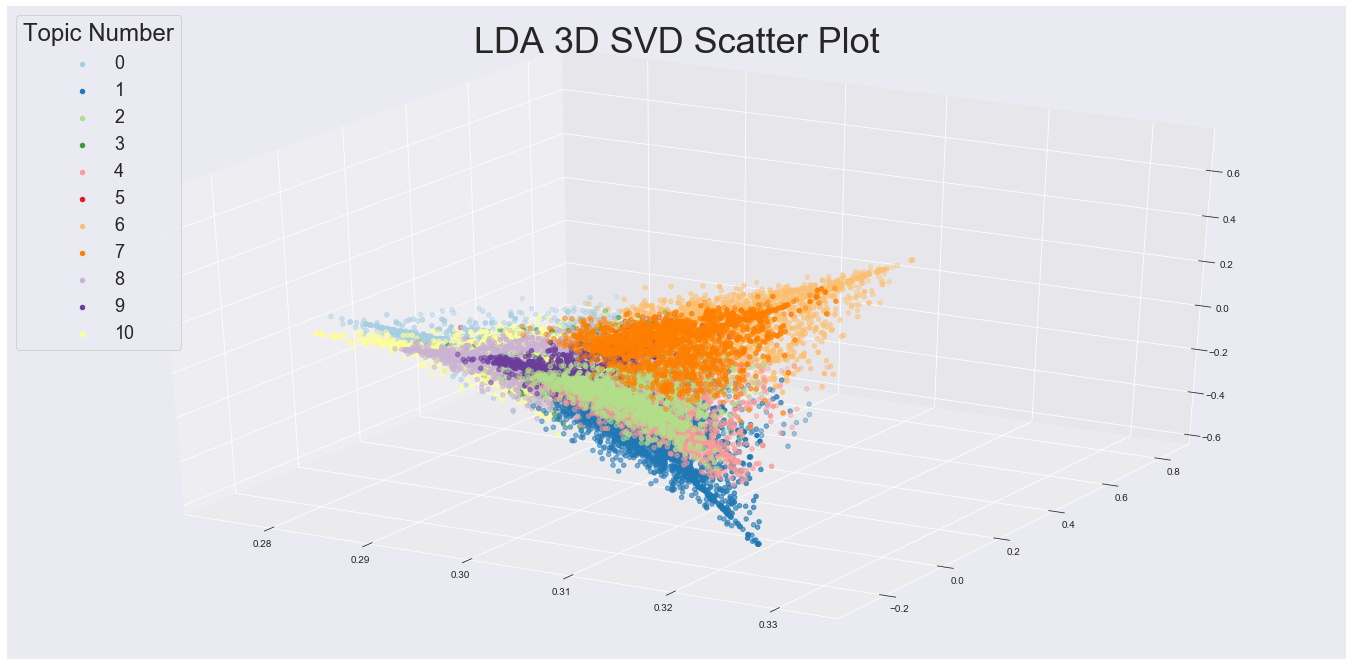

In [53]:
# same but with SVD
svd3 = TruncatedSVD(n_components=3)
lda_output_svd3 = svd3.fit_transform(lda_output)
sx3 = lda_output_svd3[:,0]
sy3 = lda_output_svd3[:,1]
sz3 = lda_output_svd3[:,2]
s = {'x':sx3, 'y':sy3, 'z':sz3, 'topic':clusters}
svd3df = pd.DataFrame(s)
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
for i, topic in enumerate(sorted(svd3df.topic.unique())):
    ax.scatter(xs=svd3df.loc[svd3df.topic == topic,'x'],ys=svd3df.loc[svd3df.topic == topic,'y'],zs=svd3df.loc[svd3df.topic == topic,'z'],label=topic, c=sns.color_palette('Paired')[i])
ax.set_title('LDA 3D SVD Scatter Plot', fontsize=36)
ax.legend(title_fontsize=24,fontsize=18, loc='upper left').set_title('Topic Number')
fig.savefig('LDA_3D_SVD_Scatter_Plot.png')

In [ ]:
# setting up interactive lda visualization
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
panel = pyLDAvis.sklearn.prepare(best_model, data_cvect, cvectorizer, mds='tsne')
pyLDAvis.save_html(panel, 'lda.html')
panel

### Experimenting with NMF

In [0]:
# setting up some baseline for NMF, while also entering parameters for randomized search, but couldn't get it working
nmfparams={'n_components':range(10,26), 'init':[None, 'random','nndsvd', 'nndsvda', 'nndsvdar'], 'solver':['cd','mu'], 'alpha':[.01,.02,.05,.1,.25,.5,1], 'l1_ratio':[.01,.02,.05,.1,.25,.5,1]}
nmf = NMF(n_components=20, solver='mu')
nmf_output = nmf.fit_transform(data_tfvect)

In [71]:
# looking at the nmf defined topics
show_topics(tfvectorizer, nmf)

[array(['not', 'do', 'people', 'forget', 'waste', 'leave', 'exist', 'miss',
        'have', 'mean'], dtype='<U15'),
 array(['help', 'child', 'way', 'people', 'save', 'live', 'donate', 'turn',
        'year', 'work'], dtype='<U15'),
 array(['new', 'audi', 'year', 'look', 'old', 'mini', 'clean', 'brand',
        'introduce', 'collection'], dtype='<U15'),
 array(['life', 'save', 'bring', 'live', 'rock', 'donate', 'saving',
        'blood', 'sport', 'short'], dtype='<U15'),
 array(['good', 'idea', 'friend', 'taste', 'food', 'bad', 'look', 'night',
        'make', 'sound'], dtype='<U15'),
 array(['world', 'cup', 'well', 'real', 'welcome', 'dream', 'online',
        'game', 'different', 'perfect'], dtype='<U15'),
 array(['love', 'hate', 'fall', 'live', 'get', 'real', 'woman', 'start',
        'heart', 'man'], dtype='<U15'),
 array(['time', 'long', 'spend', 'right', 'great', 'live', 'place',
        'think', 'people', 'take'], dtype='<U15'),
 array(['know', 'music', 'have', 'right', 'watch', 

In [0]:
# creating clusters of nmf topics and reducing dimensionality with pca
nmfclusters = KMeans(n_clusters=20).fit_predict(nmf_output)
pcanmf = PCA(n_components = 2)
nmf_output_pca = pcanmf.fit_transform(nmf_output)
x_nmf_pca = nmf_output_pca[:,0]
y_nmf_pca = nmf_output_pca[:,1]

In [0]:
cmap = sns.blend_palette(sns.color_palette('Paired'), 20)

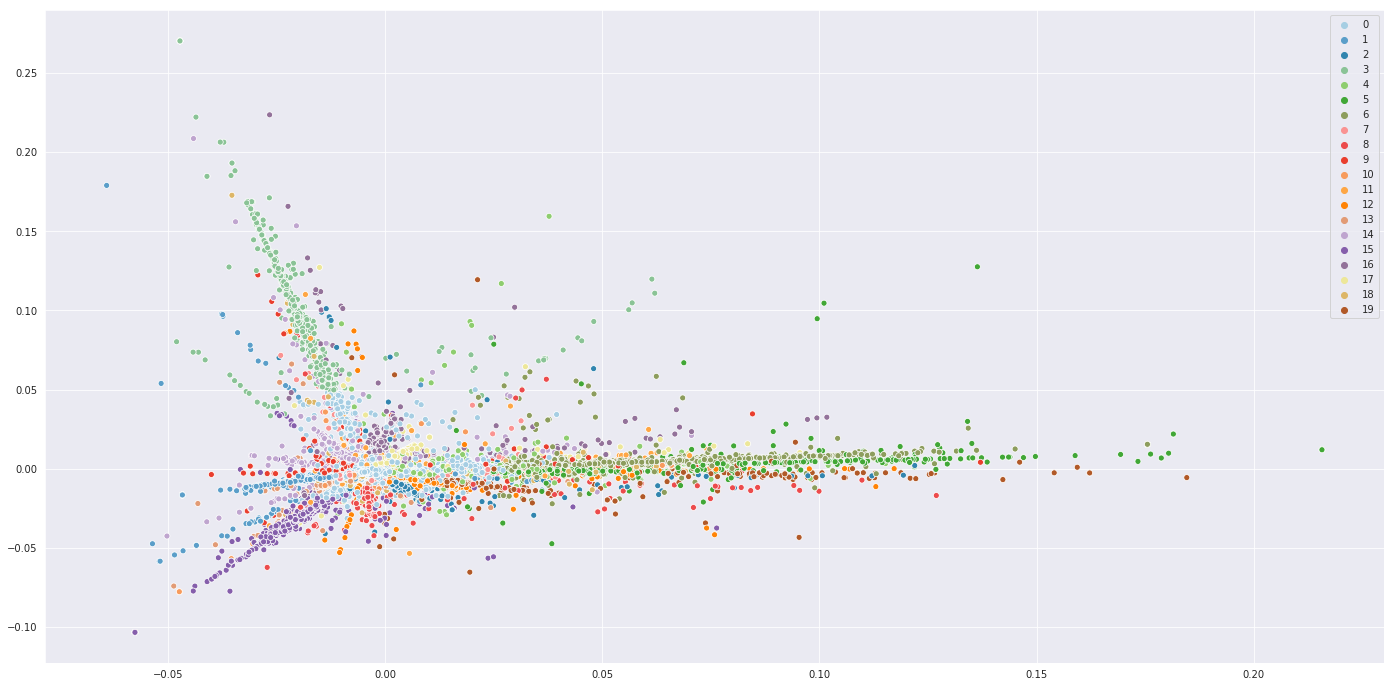

In [79]:
# visualizing nmf clusters
plt.figure(figsize=(24,12))
sns.scatterplot(x_nmf_pca,y_nmf_pca,hue=nmfclusters, legend='full', palette=cmap)

### More LDA Topic Visualizations

In [58]:
# appending all topics and topic probability scores to lists
topics = []
scores = []
for n in tq(range(lda_output.shape[0])):
    topics.append(lda_output[n].argmax())
    scores.append(max(lda_output[n]))

In [61]:
# adding to the dataframe
headlines['topic'] = topics
headlines['score'] = scores
headlines.head()

brand        country medium  \
0                Tzabar         Israel  Print   
1              Infiniti  United States  Print   
2                Toyota         Canada  Print   
3  Friends of the Earth        Germany  Print   
4            Max Factor       Colombia  Print   

                                            headline  \
0  roger waters live in paris 3 nights  concert €...   
1                            accelerating the future   
2    official ride of the spinfest amateur dj awards   
3  travelling fruits cause pollution think global...   
4                                  the art of beauty   

                       industry  topic     score  
0           Transport & Tourism      7  0.566381  
1         Automotive & Services     10  0.427353  
2         Automotive & Services      1  0.205000  
3  Public interest & Non-profit      8  0.293098  
4               Beauty & Health      8  0.245496

In [63]:
# looking at topi value counts, indicating low calss imbalance
headlines['topic'].value_counts()

0     2897
9     2603
4     2340
1     2317
2     2272
7     2116
10    2013
6     1981
3     1951
5     1877
8     1865
Name: topic, dtype: int64

In [64]:
# importing libraries to create some wordclouds
from collections import Counter
from nltk.collocations import *
from operator import itemgetter
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [65]:
# adding stop words
stop_words = stopwords.words('english')
stop_words += ['1','2','3','4','5','6','7','8','9','0']

In [70]:
# defining word cloud preprocessing function as before
def df_word_analyzer(filter_column_variable_name, stop_words, new_stop_words):
    words = headlines.loc[headlines['topic'] == filter_column_variable_name, 'headline'].ravel()
    tokens = []
    for word in words:
        token = word_tokenize(word)
        tokens+=token
    stop_words += new_stop_words
    stopped = [word for word in tokens if word not in stop_words]
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmas = []
    for word in stopped:
        if word != 'us':
            lemma = lemmatizer.lemmatize(word)
            lemmas.append(lemma)
        else:
            lemmas.append(word)
    common_words = Counter(lemmas).most_common(100)
    bigrams = nltk.collocations.BigramAssocMeasures()
    bi_finder = BigramCollocationFinder.from_words(lemmas)
    bi_scored = bi_finder.score_ngrams(bigrams.raw_freq)
    trigrams = nltk.collocations.TrigramAssocMeasures()
    tri_finder = TrigramCollocationFinder.from_words(lemmas)
    tri_scored = tri_finder.score_ngrams(trigrams.raw_freq)
    bi_scored_sort = sorted(bi_scored, key=itemgetter(1), reverse=True)
    tri_scored_sort = sorted(tri_scored, key=itemgetter(1), reverse=True)
    word_freq_dict = {}
    bi_freq_dict = {}
    tri_freq_dict = {}
    for i in range(len(common_words)):
        word_freq_dict[common_words[i][0]] = common_words[i][1]
    for i in range(len(bi_scored_sort)):
        bi_freq_dict[' '.join(bi_scored_sort[i][0])] = bi_scored_sort[i][1]
    for i in range(len(tri_scored_sort)):
        text = ' '.join(tri_scored_sort[i][0])
        if 'longxi' in text:
            pass
        else:
            tri_freq_dict[text] = tri_scored_sort[i][1]
    return word_freq_dict, bi_freq_dict, tri_freq_dict

In [67]:
# also defining word cloud visualization function as before
def word_cloud(word_freq, bigram_freq, trigram_freq):
    wc1 = WordCloud(max_words=100, height = 500, width = 1000, background_color='white').generate_from_frequencies(word_freq)
    wc2 = WordCloud(max_words=100, height = 500, width = 1000, background_color='white').generate_from_frequencies(bigram_freq)
    wc3 = WordCloud(max_words=100, height = 500, width = 1000, background_color='white').generate_from_frequencies(trigram_freq)
    fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,24))
    ax1.axis('off'), ax2.axis('off'), ax3.axis('off')
    ax1.set_title('One Word', fontdict={'fontsize':30}), ax2.set_title('Bigrams', fontdict={'fontsize':30}), 
    ax3.set_title('Trigrams', fontdict={'fontsize':30})
    ax1.imshow(wc1, interpolation = 'bilinear')
    ax2.imshow(wc2, interpolation = 'bilinear')
    ax3.imshow(wc3, interpolation = 'bilinear')
    return None

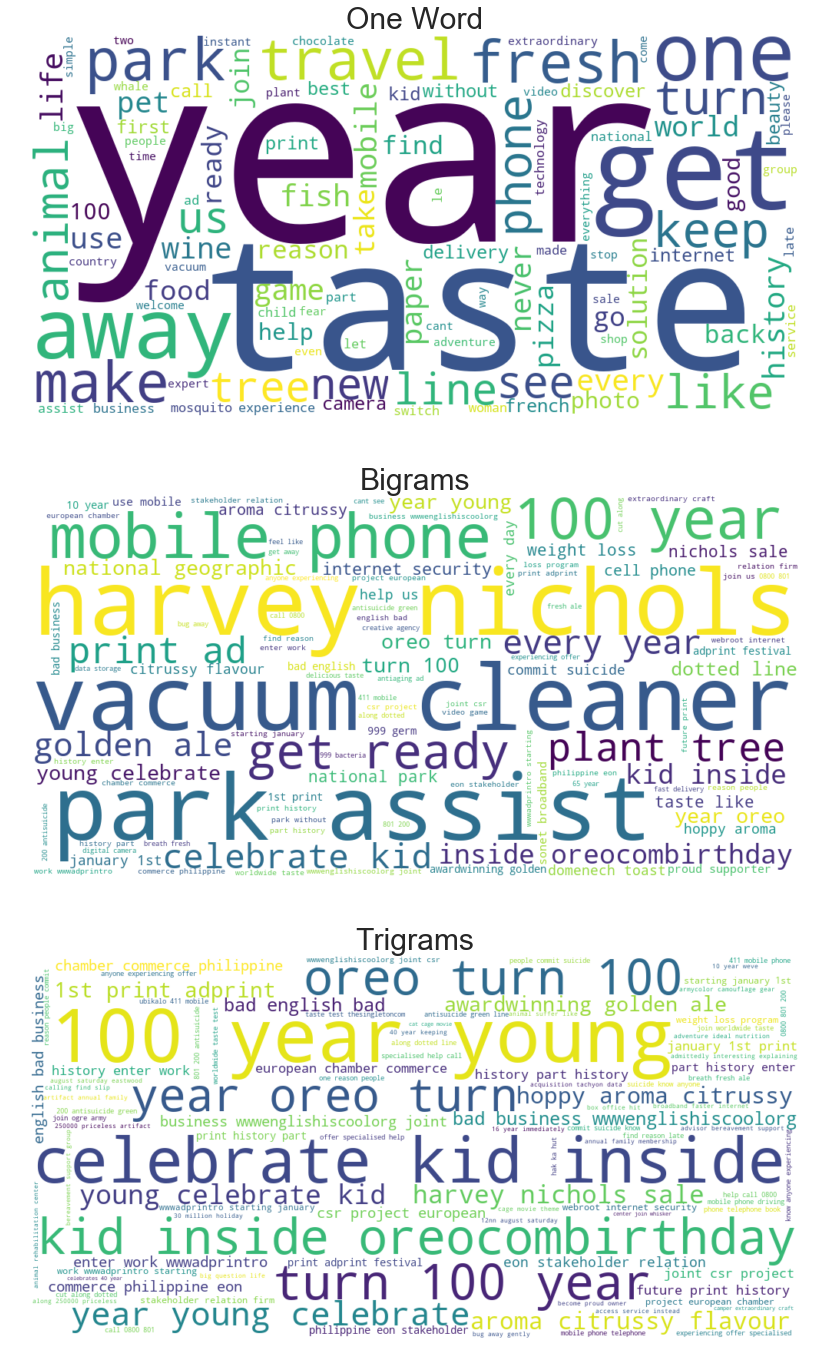

In [71]:
# unsurprisingly pretty messy!
t5_stop_words = []
t5_word_freq, t5_bigram_freq, t5_trigram_freq = df_word_analyzer(5, stop_words, t5_stop_words)
word_cloud(t5_word_freq, t5_bigram_freq,t5_trigram_freq)

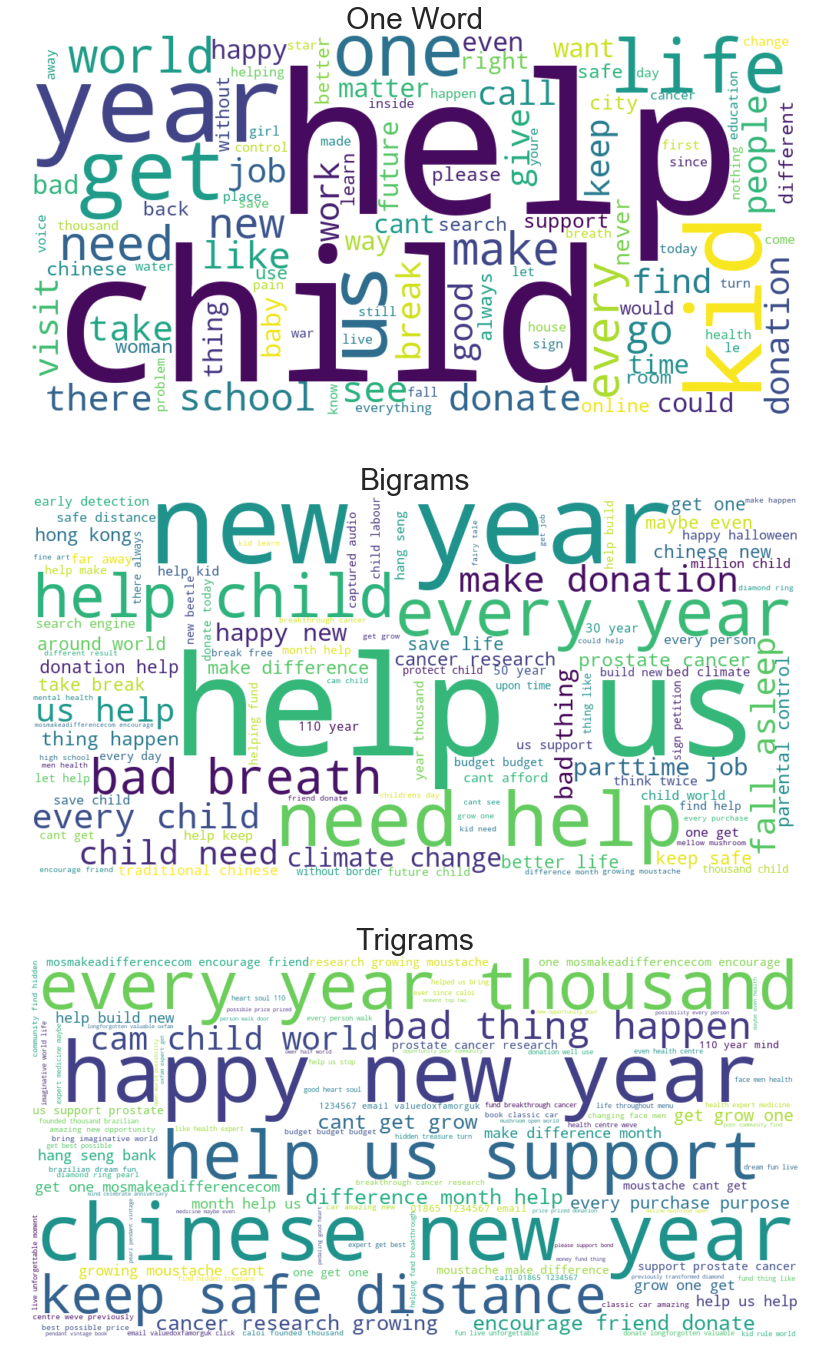

In [72]:
# here as well
t0_stop_words = []
t0_word_freq, t0_bigram_freq, t0_trigram_freq = df_word_analyzer(0, stop_words, t0_stop_words)
word_cloud(t0_word_freq, t0_bigram_freq,t0_trigram_freq)

### Topic Predictive Model Building

In [88]:
# importing libraries, defining features and target, and train-test splitting the data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X=data_tfvect
y = headlines['topic']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [131]:
# initializing multinomial naive bayes classifier, fitting to training, predicting test and looking at accuracy. despite incoherence of topics, they are pretty predictive!
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_mnb_test_preds = mnb.predict(X_test)
np.mean(y_mnb_test_preds == y_test)

0.7493294821539096

In [132]:
# looking at train accuracy
y_mnb_train_preds = mnb.predict(X_train)
np.mean(y_mnb_train_preds == y_train)

0.9002837245292752

In [134]:
# full classification report. pretty balanced throughout
from sklearn import metrics
print(metrics.classification_report(y_test, y_mnb_test_preds))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       577
           1       0.80      0.82      0.81       475
           2       0.72      0.80      0.76       461
           3       0.86      0.61      0.71       410
           4       0.72      0.77      0.75       452
           5       0.86      0.66      0.74       353
           6       0.75      0.68      0.71       389
           7       0.81      0.68      0.74       438
           8       0.84      0.65      0.73       357
           9       0.68      0.87      0.76       509
          10       0.81      0.68      0.74       426

   micro avg       0.75      0.75      0.75      4847
   macro avg       0.77      0.74      0.75      4847
weighted avg       0.76      0.75      0.75      4847



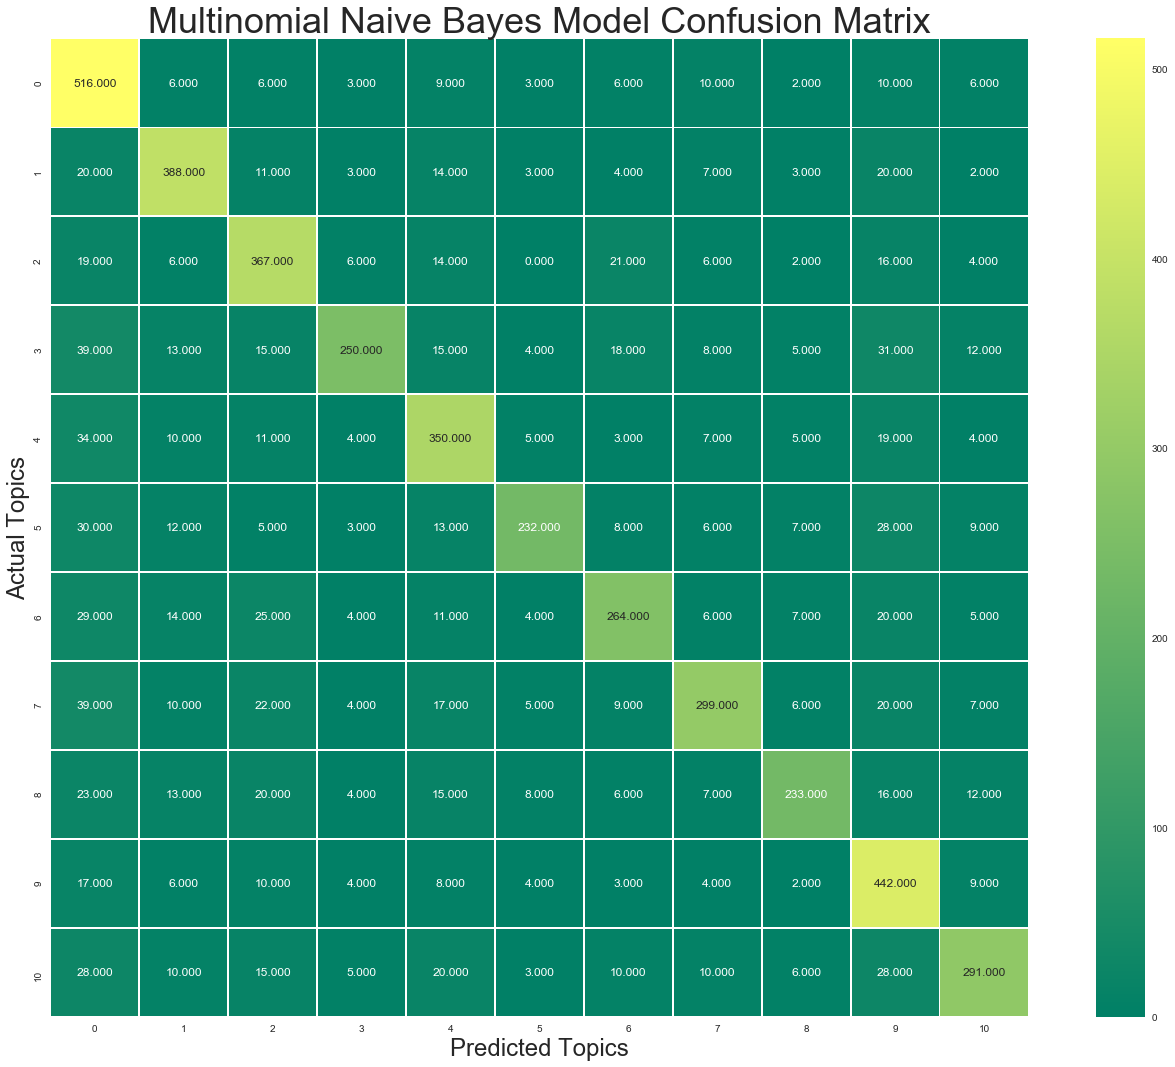

In [153]:
# confusion matrix of mnb model
from sklearn.metrics import confusion_matrix
cm_lr_base = confusion_matrix(y_test, y_mnb_test_preds)
plt.figure(figsize = (24, 18))
h=sns.heatmap(cm_lr_base, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap='summer')
plt.title('Multinomial Naive Bayes Model Confusion Matrix', fontsize=36)
plt.ylabel('Actual Topics', fontsize=24)
plt.xlabel('Predicted Topics', fontsize=24)
plt.savefig('mnb_confusion_matrix.png')

In [110]:
# testing support vector machines. mistakenly didn't reduce dimensionality, but still likely would perform much more poorly than mnb as indicated below
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_svc_testpreds = svc.predict(X_test)
y_svc_trainpreds = svc.predict(X_train)
print(metrics.accuracy_score(y_train,y_svc_trainpreds))
print(metrics.accuracy_score(y_test,y_svc_testpreds))

0.11968016507608976
0.11904270682896637


In [101]:
# randomized search parameters and fitting
svc_params = {'degree':range(1,5),'probability':[True, False], 'decision_function_shape':['ovo','ovr'], 'gamma': ['auto', 'scale']}
svc_model = RandomizedSearchCV(svc,param_distributions=svc_params, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
svc_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 108.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'degree': range(1, 5), 'probability': [True, False], 'decision_function_shape': ['ovo', 'ovr'], 'gamma': ['auto', 'scale']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=3)

In [103]:
# best svc model and params
best_svc = svc_model.best_estimator_
svc_model.best_params_

{'probability': True,
 'gamma': 'scale',
 'degree': 4,
 'decision_function_shape': 'ovo'}

In [104]:
# fitting and testing accuracy showing improvement but still poor
best_svc.fit(X_train, y_train)
y_best_svc_test_preds = best_svc.predict(X_test)
y__best_svctrain_preds = best_svc.predict(X_train)
np.mean(y_best_svc_test_preds == y_test), np.mean(y__best_svctrain_preds == y_train)

(0.23705384774087065, 0.24219757544493165)

In [107]:
# moving on to random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_train_rfbase = rf.predict(X_train)
y_pred_test_rfbase = rf.predict(X_test)

In [108]:
# baseline train accuracy indicates that with tuning this could be a good model
print(metrics.accuracy_score(y_train,y_pred_train_rfbase))
print(metrics.accuracy_score(y_test,y_pred_test_rfbase))

0.9815321124580861
0.5879925727253972


In [114]:
# setting up parameters for randomized search and fitting
rf_params = {'n_estimators': [25,50,100,200,300,400,500,600,700,800,900,1000], 'criterion':['gini', 'entropy'], 'max_depth': range(3,11), 
             'min_samples_split': range(2,11,2), 'max_features':['auto', 'sqrt', 'log2']}
rfc_model = RandomizedSearchCV(rf, param_distributions=rf_params, scoring='accuracy', verbose=10, n_jobs=-1, cv=5)
rfc_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': range(3, 11), 'min_samples_split': range(2, 11, 2), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=10)

In [116]:
# best rfc params
rfc_model.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 7,
 'criterion': 'entropy'}

In [117]:
# weirdly made both train and test test accuracy far worse. no idea why but decided to move on
best_rfc = rfc_model.best_estimator_
best_rfc.fit(X_train, y_train)
y_test_rfc_preds = best_rfc.predict(X_test)
y_train_rfc_preds = best_rfc.predict(X_train)
print(metrics.accuracy_score(y_train,y_train_rfc_preds))
print(metrics.accuracy_score(y_test,y_test_rfc_preds))

0.32473562032499353
0.30080462141530845


In [118]:
# lastly testing xgboost. more balanced baseline accuracy than rfc seems to be a good sign
from xgboost import XGBClassifier
xgbc_base = XGBClassifier(objective='multi:softmax', num_class=11)
xgbc_base.fit(X_train,y_train)
y_pred_train_xgbc_base = xgbc_base.predict(X_train)
y_pred_test_xgbc_base = xgbc_base.predict(X_test)
print(metrics.accuracy_score(y_train,y_pred_train_xgbc_base))
print(metrics.accuracy_score(y_test,y_pred_test_xgbc_base))

0.5878772246582409
0.5324943263874562


In [127]:
# setting up parameters for randomized search and fitting
xgbc=XGBClassifier(num_class=11)
objective=['multi:softmax','multi:softprob']
max_depth= range(3,10)
learning_rate= [.1,.2,.3,.4,.5]
n_estimators= range(100,1000,100)
colsample_bytree= [.1,.25,.33,.5,.75,1]
reg_alpha= [.01,.1,.25,.5,1,2,5] 
reg_lambda= [.01,.1,.25,.5,1,2,5]
n_thread=range(1,5,1)
xgbc_params=dict(objective=objective, max_depth=max_depth, learning_rate=learning_rate, n_estimators= range(100,1000,100),
                 colsample_bytree= [.1,.25,.33,.5,.75,1], reg_alpha= [.01,.1,.25,.5,1,2,5], reg_lambda= [.01,.1,.25,.5,1,2,5],
                 n_thread=range(1,5,1))
xgbc_model = RandomizedSearchCV(xgbc, param_distributions=xgbc_params, cv=5, n_jobs=-1, verbose=10)
xgbc_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 46.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 142.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 164.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=11,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'objective': ['multi:softmax', 'multi:softprob'], 'max_depth': range(3, 10), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 'n_estimators': range(100, 1000, 100), 'colsample_bytree': [0.1, 0.25, 0.33, 0.5, 0.75, 1], 'reg_alpha': [0.01, 0.1, 0.25, 0.5, 1, 2, 5], 'reg_lambda': [0.01, 0.1, 0.25, 0.5, 1, 2, 5], 'n_thread': range(1, 5)},
          pre_dispatch='2*n_jobs', random_state=None, r

In [129]:
# fitting and printing accuracy scores. significant improvement, but better performance on train and worse performance on test vs mnb indicates its still a worse algorithm to use here. simpler is better!
print(xgbc_model.best_params_)
best_xgbc = xgbc_model.best_estimator_
best_xgbc.fit(X_train, y_train)
y_test_xgbc = best_xgbc.predict(X_test)
y_train_xgbc = best_xgbc.predict(X_train)
print(metrics.accuracy_score(y_test, y_test_xgbc))
print(metrics.accuracy_score(y_train, y_train_xgbc))

{'reg_lambda': 2, 'reg_alpha': 0.25, 'objective': 'multi:softprob', 'n_thread': 4, 'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.4, 'colsample_bytree': 0.5}
0.7027027027027027
0.9661078153211246


In [ ]:
# using yellowbrick to give above classifcation report a nice visualization
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(mnb, cmap='YlGn', size=(1080,720), title='Mulitnomial Naive Bayes Classification Report', fontsize=36)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.ax.title(label=visualizer.ax.get_title(),fontsize=36)
visualizer.ax.set_xticklabels(labels=['Precision', 'Recall', 'F1'],fontsize=18)
visualizer.ax.set_yticklabels(labels=visualizer.ax.get_yticklabels(), fontsize=14)
visualizer.poof(outpath='mnb_class_report.png')

TypeError: 'Text' object is not callable